In [415]:
import numpy as np
import matplotlib.pyplot as plt
import spoof_data as spoof
import metrics as metric
import kalman_filter as kf

In [416]:
num_points = 1000
spoofer_ = spoof.SpoofData()
data, noisy_data, timestamps = spoofer_.run3()

In [417]:
state_cov_mat = np.array([1, 2, 6, 2, 1, 2, 6, 2, 0]).reshape(3,3)*0.001
meas_cov_mat = np.array([-7, 4, 3, 4, 5, 6, 3, 6, 1]).reshape(3,3)*0.6
sys_noise_cov_mat = np.array([-10, 15, 3, 15, -10, 2, 3, 2, 1000]).reshape(3,3)*-9

filter_ = kf.KalmanFilter(0, state_cov_mat, meas_cov_mat, sys_noise_cov_mat)
estimates = []

for i in range(len(timestamps)):
    estimate = filter_.estimate(timestamps[i],  noisy_data[i])
    estimates.append(estimate)


In [418]:
est_accs = []
real_accs = []
for i in range(len(estimates)):
  est_accs.append(estimates[i][0])
  real_accs.append(data[i][0])


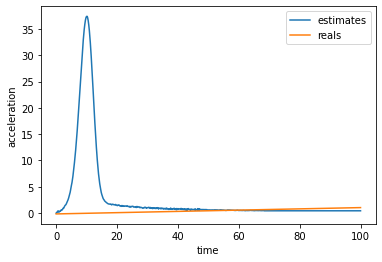

In [419]:
plt.plot(timestamps[0:num_points], est_accs[0:num_points], label="estimates")
plt.plot(timestamps[0:num_points], real_accs[0:num_points], label="reals")
plt.xlabel("time")
plt.ylabel("acceleration")
plt.legend()
plt.show()

In [420]:
est_accs = []
real_accs = []
for i in range(len(estimates)):
  est_accs.append(estimates[i][1])
  real_accs.append(data[i][1])

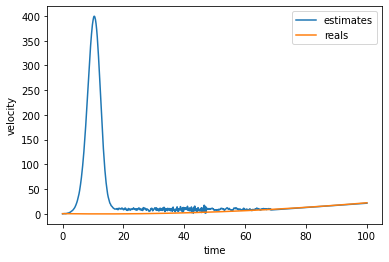

In [421]:
plt.plot(timestamps[0:num_points], est_accs[0:num_points], label="estimates")
plt.plot(timestamps[0:num_points], real_accs[0:num_points], label="reals")
plt.xlabel("time")
plt.ylabel("velocity")
plt.legend()
plt.show()

In [422]:
est_accs = []
real_accs = []
for i in range(len(estimates)):
  est_accs.append(estimates[i][2])
  real_accs.append(data[i][2])

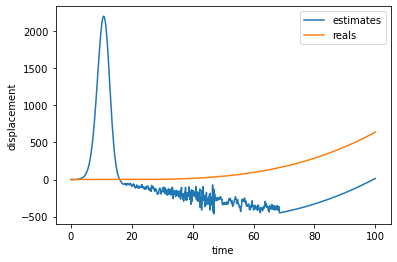

In [423]:
plt.plot(timestamps[0:num_points], est_accs[0:num_points], label="estimates")
plt.plot(timestamps[0:num_points], real_accs[0:num_points], label="reals")
plt.xlabel("time")
plt.ylabel("displacement")
plt.legend()
plt.show()